# Spinning Earth due to an Asteroid Impact

ModSim Project 3

Kristtiya Guerra, HK Rho

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import random
import decimal
import math

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
d = UNITS.degrees
rad = UNITS.radians;

ASTEROID: 99942Apophis

# First Part - Until Collision

In [3]:
# initializing the (x,y) of the asteroid
x0 = 4.64e8
y0 = 0


# make an initial state that includes the position and the velocity of the asteroid
init = State(x = x0 * m, 
             y = y0 * m, 
             v_x = -25000 * m/s, # m/s - X Velocity of Asteroid
             v_y = 0 * m/s, # m/s - Y Velocity of Asteroid
             )

,values
x,464000000.0 meter
y,0 meter
v_x,-25000.0 meter / second
v_y,0.0 meter / second


In [4]:
r_asteroid = 473174.136 * m
r_earth = 6.371e6*m 

system = System(init=init,
                
                m_earth = 5.972e24 * kg,
                c_earth = 40.075e6 * m,
                Vol_earth = 1.08320692e21 * m**3,
                init_w_earth = 7.2921159e-5 * rad/s,
                
                density_asteroid = 3200 * kg / m**3,
                m_asteroid = 2.67e20 * kg,
            
                G=6.674e-11 * m**3 * kg **-1 * s **-2, 
                striking_angle = 45 * d,
               
                r_final=r_asteroid + r_earth,
                t_0=0,
                t_end=1e10
                )


,values
init,x 464000000.0 meter y ...
m_earth,5.972e+24 kilogram
c_earth,40075000.0 meter
Vol_earth,1.08320692e+21 meter ** 3
init_w_earth,7.2921159e-05 radian / second
density_asteroid,3200.0 kilogram / meter ** 3
m_asteroid,2.67e+20 kilogram
G,6.674e-11 meter ** 3 / kilogram / second ** 2
striking_angle,45 degree
r_final,6844174.136 meter


In [5]:
def y_dependingOn_angle(angle):
    """
    Computes the y position of the asteroid depending on the angle of collision
    """
    
    y = r_earth * math.sin(angle)
    
    return y

In [6]:
y = y_dependingOn_angle(system.striking_angle)

<Quantity(4504977.302939494, 'meter')>

In [7]:
def universal_gravitation(init, system):
    """Computes gravitational force between Asteroid and Earth.
    """
    x, y, v_x, v_y = init
    unpack(system)

    forceMag = G * m_earth * m_asteroid / (x**2 + y**2)
    #negative because it is positive outwards (distance increases as I go out)
    r = Vector(-x, -y)
    gravity = forceMag * r.hat()
    
    return gravity

In [8]:
universal_gravitation(init, system)

<Quantity([-4.94289405e+17  0.00000000e+00], 'kilogram * meter / second ** 2')>

In [9]:
def slope_func(init, dt, system):
    x, y, v_x, v_y = init

    unpack(system)
    
    gravity = universal_gravitation(init, system)
    dxdt = v_x
    dydt = 0
    dvxdt = gravity[0]/ m_asteroid
    dvydt = 0
    
    return dxdt, dydt, dvxdt, dvydt

In [10]:
slope_func(init, 0, system)

(<Quantity(-25000.0, 'meter / second')>,
 0,
 <Quantity(-0.0018512711801426875, 'meter / second ** 2')>,
 0)

In [11]:
def event_func(init, dt, system):
    
    x, y, v_x, v_y = init
    r = Vector(x,y)
    
    # stops run simulation when the asteroid comes into contact with earth's surface
    return r.x - system.r_final # m

In [12]:
event_func(init, 0, system)

<Quantity(457155825.864, 'meter')>

In [13]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[18208.805245839594]]
nfev,50
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [14]:
results

,x,y,v_x,v_y
0.000000,4.640000e+08,0.0,-25000.000000,0.0
0.820203,4.639795e+08,0.0,-25000.001518,0.0
9.022236,4.637744e+08,0.0,-25000.016711,0.0
91.042566,4.617239e+08,0.0,-25000.169375,0.0
911.245865,4.412181e+08,0.0,-25001.774067,0.0
9113.278849,2.360505e+08,0.0,-25033.164047,0.0
18208.805246,6.844174e+06,0.0,-25405.385450,0.0


In [15]:
v_at_collision = get_last_value(results.v_x) * m/s

<Quantity(-25405.385450352966, 'meter / second')>

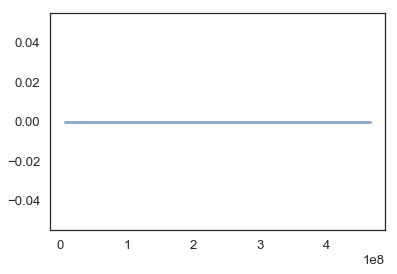

In [16]:
x = results.x
y = results.y

# used to check the trajectory of the asteroid
plot(x,y)

# Second Part - Math

In [17]:
def make_system(ang_asteroid, y):
    
    x0 = 4.64e8
    y0 = y

    init = State(x = x0 * m, 
                 y = y0 * m, 
                 v_x = -25000 * m/s, # m/s - X Velocity of Asteroid
                 v_y = 0 * m/s, # m/s - Y Velocity of Asteroid
                 )
    
    return System(init=init,
                  m_earth = 5.972e24 * kg,
                  c_earth = 40.075e6 * m,
                  Vol_earth = 1.08320692e21 * m**3,
                  init_w_earth = 7.2921159e-5 * rad/s ,
                  density_asteroid = 3200 * kg / m**3,
                  m_asteroid = 2.67e20 * kg,
            
                  G=6.674e-11 * m**3 * kg **-1 * s **-2, 
                  striking_angle = ang_asteroid,
               
                  r_final=r_asteroid + r_earth,
                  t_0=0,
                  t_end=1e10
                 )

In [18]:
def energy_to_velocity(system, v_at_collision):
    """
    Function that converts:
    energy from the asteroid -> angular velocity of the earth
    """
    
    unpack(system)
    
    inertia_earth = (2/5 * m_earth * (r_earth**2))
    inertia_asteroid = (2/5 * m_asteroid * (r_asteroid**2))
    inertia_both = inertia_earth + inertia_asteroid
    
    final_w_earth = sqrt(((m_asteroid * (v_at_collision**2)) + (inertia_earth * (init_w_earth**2))) / inertia_both) 

    return final_w_earth #rad/sec

In [19]:
w = energy_to_velocity(system, v_at_collision)

<Quantity(8.423077064284763e-05, '1 / second')>

In [20]:
def time_for_revolution(w_earth, system):
    """
    Function that calculates the time it takes for earth 
    to spin depending on the changed angular velocity
    """
    
    unpack(system)
    
    time = c_earth / (r_earth * w_earth) 
    
    return time

In [21]:
output = time_for_revolution(w, system)

<Quantity(74678.42532281567, 'second')>

In [22]:
output.to(UNITS.hours)

<Quantity(20.744007034115466, 'hour')>

# Sweeping Through the Different Angles

Now that we know that the code is working, we will use sweepseries to see the time it takes earth to complete one revolution depending on the different angle the asteroid strikes earth at the moment of collision.

In [23]:
# making an array of different angles
dA = math.pi / 12 # deg &PLZ EXPLAIN WHY WE USED RADIANS
ang_asteroid = linrange(-math.pi / 2, math.pi / 2, dA, endpoint = True) # degrees

# making a SweepSeries
sweep_angle = SweepSeries()


for i in range(len(ang_asteroid)):
    #finds the initial y position that the asteroid has to be at to strike at the desired angle
    y = y_dependingOn_angle(ang_asteroid[i])
    system = make_system(ang_asteroid[i], y)
    
    results, details = run_ode_solver(system, slope_func, events=event_func)
    
    v_at_collision = get_last_value(results.v_x) * m/s
    
    w = energy_to_velocity(system, v_at_collision)
    output = time_for_revolution(w, system)
    hrs = output.to(UNITS.hours)
    
    
    sweep_angle[ang_asteroid[i]] = hrs
    
    
print(sweep_angle)

-1.570796e+00    20.713491516148316 hour
-1.308997e+00     20.71567607864414 hour
-1.047198e+00     20.72151332404663 hour
-7.853982e-01      20.7292163382837 hour
-5.235988e-01     20.73667916338952 hour
-2.617994e-01    20.742049097705966 hour
-3.330669e-16    20.744007034115466 hour
 2.617994e-01    20.742049097705966 hour
 5.235988e-01     20.73667916338952 hour
 7.853982e-01      20.7292163382837 hour
 1.047198e+00     20.72151332404663 hour
 1.308997e+00     20.71567607864414 hour
 1.570796e+00    20.713491516148316 hour
dtype: object


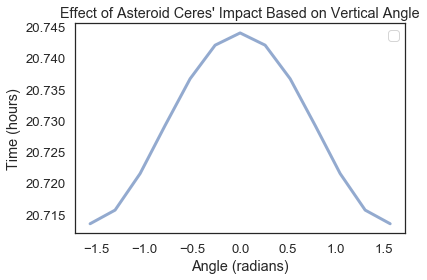

In [34]:
plot(sweep_angle)
decorate(title="Effect of Asteroid Ceres' Impact Based on Vertical Angle",
xlabel='Angle (radians)',
ylabel='Time (hours)')

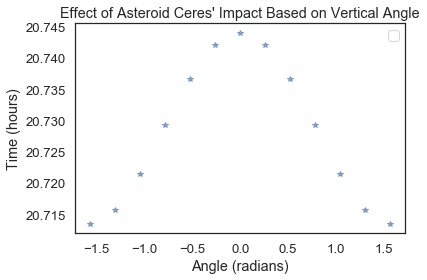

In [25]:
plot(sweep_angle, "*")
decorate(title="Effect of Asteroid Ceres' Impact Based on Vertical Angle",
xlabel='Angle (radians)',
ylabel='Time (hours)')

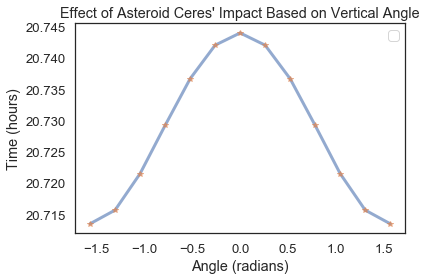

In [26]:
plot(sweep_angle)
plot(sweep_angle, "*")
decorate(title="Effect of Asteroid Ceres' Impact Based on Vertical Angle",
xlabel='Angle (radians)',
ylabel='Time (hours)')

## 99942 Aphopis

In [35]:
r_asteroid2 = 185 * m
r_earth = 6.371e6 * m 

system2 = System(init=init,
                m_earth = 5.972e24 * kg,
                c_earth = 40.075e6 * m,
                Vol_earth = 1.08320692e21 * m ** 3,
                init_w_earth = 7.2921159e-5 * rad/s ,
                density_asteroid = 3200 * kg / m ** 3,
                m_asteroid = 26990000000 * kg,
            
                G=6.674e-11 * m**3 * kg **-1 * s **-2, 
               
                r_final=r_asteroid2 + r_earth,
                t_0=0,
                t_end=1e10
                )


,values
init,x 464000000.0 meter y 63710...
m_earth,5.972e+24 kilogram
c_earth,40075000.0 meter
Vol_earth,1.08320692e+21 meter ** 3
init_w_earth,7.2921159e-05 radian / second
density_asteroid,3200.0 kilogram / meter ** 3
m_asteroid,26990000000 kilogram
G,6.674e-11 meter ** 3 / kilogram / second ** 2
r_final,6371185.0 meter
t_0,0


In [36]:
def make_system2(ang_asteroid, y):
    
    x0 = 4.64e8
    y0 = y

    init = State(x = x0 * m, 
                 y = y0 * m, 
                 v_x = -25000 * m/s, # m/s - X Velocity of Asteroid
                 v_y = 0 * m/s, # m/s - Y Velocity of Asteroid
                 )
    
    return System(init=init,
                  m_earth = 5.972e24 * kg,
                  c_earth = 40.075e6 * m,
                  Vol_earth = 1.08320692e21 * m**3,
                  init_w_earth = 7.2921159e-5 * rad/s ,
                  density_asteroid = 3200 * kg / m**3,
                  m_asteroid = 2.699e10 * kg,
            
                  G=6.674e-11 * m**3 * kg **-1 * s **-2, 
                  striking_angle = ang_asteroid,
               
                  r_final=r_asteroid + r_earth,
                  t_0=0,
                  t_end=1e10
                 )

In [46]:
dA = math.pi / 12 # deg
ang_asteroid = linrange(- math.pi / 2, math.pi / 2, dA, endpoint = True) # degrees


aphophis = SweepSeries()


for i in range(len(ang_asteroid)):
    y = y_dependingOn_angle(ang_asteroid[i])
    system = make_system2(ang_asteroid[i], y)
    
    results, details = run_ode_solver(system, slope_func, events=event_func)
    
    v_at_collision = get_last_value(results.v_x) * m/s
    
    w = energy_to_velocity(system, v_at_collision)
    output = time_for_revolution(w, system)
    hrs = output.to(UNITS.hours)
    
    
    aphophis[ang_asteroid[i]] = hrs
    
    
print(aphophis)

-1.570796e+00    23.961271634126522 hour
-1.308997e+00    23.961271634126863 hour
-1.047198e+00    23.961271634127783 hour
-7.853982e-01    23.961271634128988 hour
-5.235988e-01    23.961271634130156 hour
-2.617994e-01    23.961271634130995 hour
-3.330669e-16    23.961271634131304 hour
 2.617994e-01    23.961271634130995 hour
 5.235988e-01    23.961271634130156 hour
 7.853982e-01    23.961271634128988 hour
 1.047198e+00    23.961271634127783 hour
 1.308997e+00    23.961271634126863 hour
 1.570796e+00    23.961271634126522 hour
dtype: object


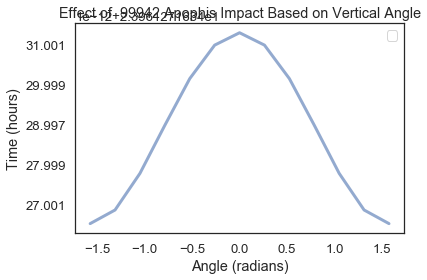

In [48]:
plot(aphophis)
decorate(title="Effect of  99942 Apophis Impact Based on Vertical Angle",
xlabel='Angle (radians)',
ylabel='Time (hours)')